# Sales Lead Project

## Description
The project is to score leads for a vendor that sells to municipal governments.  We have a dataset with every city & town in the US with demographic information from the Census Bureau (ACS 2012) with demographic information covering age, income, educational attainment, ethnicity, etc., along with flags indicating whether that "Place" (city or town) is currently or ever was a customer of the company.

The goal is to use this data to build a model to score sales leads to guide sales & marketing efforts.

Dataset is available [here](https://s3.amazonaws.com/shared.xuku.com/4A0F5019074F4B2A3F5E/place_stats.csv.zip).
Description of fields is [here](https://gist.github.com/neilberkman/87beba095cd3b412797a4167d552e5dd).

We define as **dependent variable**:
* `was_ever_customer`: 1 if this Place was ever an active customer of the product, else 0  

since we're looking for new customers who will purchase the product.

## Load and Describe the Data

In [262]:
import pandas as pd
import numpy as np

In [263]:
# We use encoding "latin-1" because we get an error for some non UTF8 Characters in name field
df=pd.read_csv("place_stats.csv", sep=",", encoding="latin-1")


In [264]:
# Get the first rows of the data frame
df.head()

,census_id,name,county,state,type,age,age_18_to_19_female,age_18_to_19_male,age_20_female,age_20_male,...,pct_doctorate,pct_poverty,pct_employed,pct_unemployed,pct_armed_forces,pct_civilian_labor_force,pct_asian_alone,pct_black_alone,pct_hispanic_origin,pct_white_alone
0,100124,Abbeville,NaN,AL,city,46.6,35,11,0,7,...,0.002,0.205,0.314,0.071,0.000,0.385,0.102,0.434,0.035,0.446
1,100460,Adamsville,NaN,AL,city,36.2,67,84,0,89,...,0.000,0.189,0.473,0.060,0.000,0.533,0.010,0.403,0.105,0.487
2,100484,Addison,NaN,AL,town,42.4,20,0,0,0,...,0.000,0.243,0.356,0.117,0.000,0.473,0.000,0.000,0.000,0.984
3,100676,Akron,NaN,AL,town,50.8,10,0,0,3,...,0.000,0.209,0.285,0.051,0.000,0.336,0.000,0.791,0.000,0.209
4,100820,Alabaster,NaN,AL,city,36.1,270,401,148,112,...,0.006,0.080,0.517,0.033,0.001,0.550,0.007,0.150,0.101,0.759


In [265]:
# Get a summary description of the dataset
df.describe()

,census_id,age,age_18_to_19_female,age_18_to_19_male,age_20_female,age_20_male,age_21_female,age_21_male,education_bachelors,education_doctorate,...,pct_doctorate,pct_poverty,pct_employed,pct_unemployed,pct_armed_forces,pct_civilian_labor_force,pct_asian_alone,pct_black_alone,pct_hispanic_origin,pct_white_alone
count,1.967100e+04,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,1.967100e+04,19671.000000,...,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000,19671.000000
mean,3.062673e+06,39.918103,151.865487,154.316659,81.327640,82.120024,78.751004,80.479081,1.170512e+03,80.765187,...,0.004431,0.162569,0.438554,0.043166,0.001484,0.481718,0.012669,0.076516,0.087288,0.852625
std,1.527684e+06,7.857833,1159.492665,1168.332981,647.961372,657.450741,641.809946,638.401154,1.067657e+04,770.310404,...,0.009607,0.114606,0.091822,0.029499,0.009029,0.087705,0.036151,0.167044,0.174032,0.197101
min,1.001240e+05,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.868769e+06,34.700000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+01,0.000000,...,0.000000,0.080000,0.385000,0.024000,0.000000,0.431000,0.000000,0.000000,0.004000,0.812000
50%,2.952076e+06,39.300000,12.000000,14.000000,4.000000,5.000000,4.000000,5.000000,8.300000e+01,0.000000,...,0.000000,0.141000,0.444000,0.039000,0.000000,0.487000,0.000000,0.007000,0.025000,0.934000
75%,4.216992e+06,44.400000,54.000000,60.000000,27.000000,28.000000,26.000000,28.000000,4.150000e+02,17.000000,...,0.005000,0.219000,0.497000,0.057000,0.000000,0.537000,0.011000,0.054000,0.077000,0.977000
max,7.288121e+06,85.300000,108366.000000,110086.000000,61782.000000,63680.000000,60389.000000,59743.000000,1.117962e+06,74267.000000,...,0.302000,0.927000,1.000000,0.440000,0.390000,1.000000,0.652000,1.000000,1.000000,1.000000


In [266]:
# Get the column names of the dataset
df.columns

Index(['census_id', 'name', 'county', 'state', 'type', 'age',
       'age_18_to_19_female', 'age_18_to_19_male', 'age_20_female',
       'age_20_male', 'age_21_female', 'age_21_male', 'education_bachelors',
       'education_doctorate', 'education_high_school', 'education_masters',
       'employment_armed_forces', 'employment_civilian_labor_force',
       'employment_employed', 'employment_labor_force',
       'employment_unemployed', 'income', 'income_per_capita',
       'median_home_value', 'median_house_construction_year', 'population',
       'population_asian_alone', 'population_black_alone',
       'population_hispanic_origin', 'population_white_alone', 'poverty',
       'missing_data', 'active_customer', 'was_ever_customer', 'age_18_to_21',
       'pct_18_to_21', 'pct_high_school', 'pct_bachelors', 'pct_masters',
       'pct_doctorate', 'pct_poverty', 'pct_employed', 'pct_unemployed',
       'pct_armed_forces', 'pct_civilian_labor_force', 'pct_asian_alone',
       'pct_black_al

In [267]:
print("The dataset consists of {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset consists of 19671 rows and 49 columns


For convenience we represent the description of the available fields of the dataset:

The fields are 

* `census_id`: 7 character code comprised of 2 character FIPS state code + 5 character FIPS place code
* `name`: Name of the Place
* `county`: County of the Place, if provided (only present when needed to disambiguate 2 Places with the same name within a given state)
* `state`: US postal code of state containing the Place
* `type`: Type of the place (valid values provided above: city, town, etc.)
* `age`: Median age.
* `age_18_to_19_female`: The number of female persons ages 18 to 19 years old.
* `age_18_to_19_male`: The number of male persons ages 18 to 19 years old.
* `age_20_female`: The number of female persons age 20 years old
* `age_20_male`: The number of male persons age 20 years old
* `age_21_female`: The number of female persons age 21 years old
* `age_21_male`: The number of male persons age 21 years old
* `education_bachelors`: The number of persons age 25 and over who hold a Bachelor's degree.
* `education_doctorate`: The number of persons age 25 and over who hold a Doctoral degree.
* `education_high_school`: The number of persons age 25 and over who have a regular high school diploma.
* `education_masters`: The number of persons age 25 and over who hold a Master's degree.
* `employment_armed_forces`: Number of persons, age 16 or older, in the Armed Forces.
* `employment_civilian_labor_force`: Number of persons, age 16 or older, in the civilian labor force.
* `employment_employed`: Number of employed, age 16 or older, in the civilian labor force.
* `employment_labor_force`: Number of persons, age 16 or older, in the labor force.
* `employment_unemployed`: Number of unemployed, age 16 or older, in the civilian labor force.
* `income`: Median household income in the past 12 months (in 2013 inflation-adjusted dollars).
* `income_per_capita`: Per capita income in the past 12 months (in 2013 inflation-adjusted dollars).
* `median_home_value`: Median value (dollars) for Owner-Occupied housing units.
* `median_house_construction_year`: Median year housing units were built.
* `population`: Total population.
* `population_asian_alone`: Population (Asian Alone).
* `population_black_alone`: Population (Black or African American Alone).
* `population_hispanic_origin`: Population (Hispanic Origin).
* `population_white_alone`: Population (White Alone).
* `poverty`: Number of persons whose income in the past 12 months is below the poverty level.
* `missing_data`: 1 if any of the previous fields was supplied as a nil value from ACS.  These values have been translated to -1 in this dataset.
* `active_customer`: 1 if this Place is currently an active customer of the product
* `was_ever_customer`: 1 if this Place was ever an active customer of the product
* `age_18_to_21`: Total population ages 18 to 21 (college age, approximately) derived by summing the appropriate fields above.
* `pct_18_to_21`: `age_18_to_21 / population` (proxy for college-age, high values may indicate a "college town")
* `pct_high_school`: `education_high_school / population`
* `pct_bachelors`: `education_bachelors / population`
* `pct_masters`: `education_masters / population`
* `pct_doctorate`: `education_doctorate / population`
* `pct_poverty`: `poverty / population`
* `pct_employed`: `employment_employed / population`
* `pct_unemployed`: `employment_unemployed / population`
* `pct_armed_forces`: `employment_armed_forces / population`
* `pct_civilian_labor_force`: `employment_civilian_labor_force / population`
* `pct_asian_alone`: `population_asian_alone / population`
* `pct_black_alone`: `population_black_alone / population`
* `pct_hispanic_origin`: `population_hispanic_origin / population`
* `pct_white_alone`: `population_white_alone / population`

## Removing the Irrelevant Variables

For modelling perspective some variables cannot be used or cannot give us any extra information. Let's have a look at them 

`census_id`: This is the id of the census and will assign a probability to be a customer

`name`: Clearly this variable should be removed because we cannot set it as valiabe in the model  

`county`: The 99.82% of the field 'county' is missing, so there is no reason to try to impose values for the missing fields 

`active_customer`: Since the analysis will be done by considering as dependent variable the `was_ever_customer`, the `active_customer` should be removed.  

`missing_data`: This field has zero variance which since all values are 0, i.e. it is constant which means that does not give us any information and for that reason we removed it from the model.

Also we are going to remove the following fields because we do not care about the absolute but about the relative values. Since we have had already the **pct** values we do not need them anymore
`age_18_to_21`

`education_high_school`

`education_bachelors`

`education_masters`

`education_doctorate`

`poverty`

`employment_employed`

`employment_unemployed`

`employment_armed_forces`

`employment_civilian_labor_force`

`population_asian_alone`

`population_black_alone`

`population_hispanic_origin`

`population_white_alone`

The python code below shows how we can calculate the Zero Variance fields and the Null Values


In [268]:
"The {:.2%} of the field 'county' is missing".format(df["county"].isnull().sum()/len(df["county"]))

"The 99.82% of the field 'county' is missing"

Remove the fields of **Zero Variance**

In [269]:
zero_variance=pd.DataFrame(df.var()==0)

In [270]:
list(zero_variance.loc[zero_variance[0]].index)

['missing_data']

## Transform Some Variables

The field `type` has 7 unique values but the number of cases for some them is quite rare. For that reason we would merge some of those. As we can see from the table below the dataset containts only 4 observations of type **municipality** and 78 of type **urbana**. Also from the table we can see the Mean and the Standard Deviation of the total population of those types. So we can create two types with the following values:

* `Type_A`: {city, municipality, urbana}  
* `Type_B`: {borough, town, village,comunidad}

The new column is labelled as `NewType`

In [271]:
df.groupby('type').agg({'type':'count',  'population':['mean','std']}).round()

type population          
              count       mean       std
type                                    
borough        1213     3558.0    4793.0
city          10130    16639.0  110166.0
comunidad       173     2317.0    2820.0
municipality      4    93038.0  132386.0
town           4318     1911.0    6317.0
urbana           78    22380.0   52765.0
village        3755     2341.0    5839.0

In [272]:
d={'city':'Type_A', 'municipality':'Type_A', 'urbana':'Type_A',
   'borough':'Type_B', 'town':'Type_B', 'village':'Type_B','comunidad':'Type_B'}

In [273]:
df['NewType']=df['type'].map(d)

In [274]:
df.groupby('NewType').agg({'NewType':'count',  'population':['mean','std']}).round()

NewType population          
          count       mean       std
NewType                             
Type_A    10212    16713.0  109854.0
Type_B     9459     2300.0    5925.0

The field `state` has many 51 unique values. Clearly we cannot keep it as is in the model. On thing that we can do is to transform it to regions. We noticed that amongst US States there was the Puerto Rico where we labelled it as SE. 

In [275]:
len(set(df['state']))

51

In [276]:
df.groupby('state').agg({'state':'count'})

,state
state,
AK,147
AL,461
AR,500
AZ,90
CA,481
CO,268
CT,29
DC,1
DE,57


In [277]:
d= {'AK':'W',
'AL':'SE',
'AR':'SE',
'AZ':'SW',
'CA':'W',
'CO':'W',
'CT':'NE',
'DC':'NE',
'DE':'NE',
'FL':'SE',
'GA':'SE',
'HI':'W',
'IA':'MW',
'ID':'W',
'IL':'MW',
'IN':'MW',
'KS':'MW',
'KY':'SE',
'LA':'SE',
'MA':'NE',
'MD':'NE',
'ME':'NE',
'MI':'MW',
'MN':'MW',
'MO':'MW',
'MS':'SE',
'MT':'W',
'NC':'SE',
'ND':'MW',
'NE':'MW',
'NH':'NE',
'NJ':'NE',
'NM':'SW',
'NV':'W',
'NY':'NE',
'OH':'MW',
'OK':'SW',
'OR':'W',
'PA':'NE',
'RI':'NE',
'SC':'SE',
'SD':'MW',
'TN':'SE',
'TX':'SW',
'UT':'W',
'VA':'SE',
'VT':'NE',
'WA':'W',
'WI':'MW',
'WV':'SE',
'WY':'W',
'PR':'SE'   
}

In [278]:
df['region']=df['state'].map(d)

In [279]:
pd.DataFrame(df.region.value_counts())

,region
MW,8464
SE,4780
NE,2332
W,2105
SW,1990


In [280]:
sum(df.region.isnull())

0

The following fields should be transformed to relevant values, i.e. by dividing them by the `population`

So the fileds:

* `age_18_to_19_female`
* `age_18_to_19_male`
* `age_20_female`
* `age_20_male`
* `age_21_female`
* `age_21_male`

will be transformed to:

* `pct_age_18_to_19_female`
* `pct_age_18_to_19_male`
* `pct_age_20_female`
* `pct_age_20_male`
* `pct_age_21_female`
* `pct_age_21_male`

In [281]:
df['pct_age_18_to_19_female']=df['age_18_to_19_female']/df['population']
df['pct_age_18_to_19_male']=df['age_18_to_19_male']/df['population']
df['pct_age_20_female']=df['age_20_female']/df['population']
df['pct_age_20_male']=df['age_20_male']/df['population']
df['pct_age_21_female']=df['age_21_female']/df['population']
df['pct_age_21_male']=df['age_21_male']/df['population']

### Columns which will be removed
The columns that will be removed finally are the:

In [282]:
removed_col=['name', 'county','state','type',
             'age_18_to_19_female','age_18_to_19_male',
             'age_20_female','age_20_male','age_21_female', 
             'age_21_male','education_bachelors','education_doctorate', 'education_high_school','education_masters',
             'employment_armed_forces', 'employment_civilian_labor_force', 'employment_employed', 
             'employment_labor_force', 'employment_unemployed', 'population_asian_alone', 'population_black_alone',
             'population_hispanic_origin', 'population_white_alone', 'poverty', 'missing_data', 'active_customer','age_18_to_21'
            ]

In [283]:
reduced_df=df.copy()

In [284]:
reduced_df.drop(removed_col, axis=1, inplace=True)

In [285]:
reduced_df.shape

(19671, 30)

In [286]:
df.shape

(19671, 57)

In [287]:
reduced_df.head()

,census_id,age,income,income_per_capita,median_home_value,median_house_construction_year,population,was_ever_customer,pct_18_to_21,pct_high_school,...,pct_hispanic_origin,pct_white_alone,NewType,region,pct_age_18_to_19_female,pct_age_18_to_19_male,pct_age_20_female,pct_age_20_male,pct_age_21_female,pct_age_21_male
0,100124,46.6,26538,17310,87800,1972,2699,0,0.049,0.144,...,0.035,0.446,Type_A,SE,0.012968,0.004076,0.000000,0.002594,0.000000,0.029270
1,100460,36.2,43766,21197,97300,1973,4537,0,0.083,0.235,...,0.105,0.487,Type_A,SE,0.014767,0.018514,0.000000,0.019616,0.006833,0.023143
2,100484,42.4,39750,17279,110600,1972,826,0,0.024,0.207,...,0.000,0.984,Type_B,SE,0.024213,0.000000,0.000000,0.000000,0.000000,0.000000
3,100676,50.8,24485,13843,61700,1973,369,0,0.035,0.214,...,0.000,0.209,Type_B,SE,0.027100,0.000000,0.000000,0.008130,0.000000,0.000000
4,100820,36.1,71250,28272,164000,1992,30372,0,0.039,0.139,...,0.101,0.759,Type_A,SE,0.008890,0.013203,0.004873,0.003688,0.003819,0.004972


In [288]:
df.head()

,census_id,name,county,state,type,age,age_18_to_19_female,age_18_to_19_male,age_20_female,age_20_male,...,pct_hispanic_origin,pct_white_alone,NewType,region,pct_age_18_to_19_female,pct_age_18_to_19_male,pct_age_20_female,pct_age_20_male,pct_age_21_female,pct_age_21_male
0,100124,Abbeville,NaN,AL,city,46.6,35,11,0,7,...,0.035,0.446,Type_A,SE,0.012968,0.004076,0.000000,0.002594,0.000000,0.029270
1,100460,Adamsville,NaN,AL,city,36.2,67,84,0,89,...,0.105,0.487,Type_A,SE,0.014767,0.018514,0.000000,0.019616,0.006833,0.023143
2,100484,Addison,NaN,AL,town,42.4,20,0,0,0,...,0.000,0.984,Type_B,SE,0.024213,0.000000,0.000000,0.000000,0.000000,0.000000
3,100676,Akron,NaN,AL,town,50.8,10,0,0,3,...,0.000,0.209,Type_B,SE,0.027100,0.000000,0.000000,0.008130,0.000000,0.000000
4,100820,Alabaster,NaN,AL,city,36.1,270,401,148,112,...,0.101,0.759,Type_A,SE,0.008890,0.013203,0.004873,0.003688,0.003819,0.004972


Looking more carefully at the data we will see that the number of "age_18_to_19_female", "age_18_to_19_male" etc is very low and for that reason we could merge those columns by taking the sum, in order to get the:

* `pct_age_18_to_21_female`
* `pct_age_18_to_21_male`

In [289]:
reduced_df['pct_age_18_to_21_female']=reduced_df['pct_age_18_to_19_female']+reduced_df['pct_age_20_female']+reduced_df['pct_age_21_female']
reduced_df['pct_age_18_to_21_male']=reduced_df['pct_age_18_to_19_male']+reduced_df['pct_age_20_male']+reduced_df['pct_age_21_male']

In [290]:

remove_2=['pct_age_18_to_19_female',
'pct_age_18_to_19_male',
'pct_age_20_female',
'pct_age_20_male',
'pct_age_21_female',
'pct_age_21_male']

In [291]:
reduced_df.drop(remove_2, axis=1, inplace=True)

In [292]:
reduced_df.head()

,census_id,age,income,income_per_capita,median_home_value,median_house_construction_year,population,was_ever_customer,pct_18_to_21,pct_high_school,...,pct_armed_forces,pct_civilian_labor_force,pct_asian_alone,pct_black_alone,pct_hispanic_origin,pct_white_alone,NewType,region,pct_age_18_to_21_female,pct_age_18_to_21_male
0,100124,46.6,26538,17310,87800,1972,2699,0,0.049,0.144,...,0.000,0.385,0.102,0.434,0.035,0.446,Type_A,SE,0.012968,0.035939
1,100460,36.2,43766,21197,97300,1973,4537,0,0.083,0.235,...,0.000,0.533,0.010,0.403,0.105,0.487,Type_A,SE,0.021600,0.061274
2,100484,42.4,39750,17279,110600,1972,826,0,0.024,0.207,...,0.000,0.473,0.000,0.000,0.000,0.984,Type_B,SE,0.024213,0.000000
3,100676,50.8,24485,13843,61700,1973,369,0,0.035,0.214,...,0.000,0.336,0.000,0.791,0.000,0.209,Type_B,SE,0.027100,0.008130
4,100820,36.1,71250,28272,164000,1992,30372,0,0.039,0.139,...,0.001,0.550,0.007,0.150,0.101,0.759,Type_A,SE,0.017582,0.021862


# Exploratory Analysis

In [293]:
#stats
from scipy import stats
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
%matplotlib inline

## Collinearity
At this point we will try to find the correlated variables

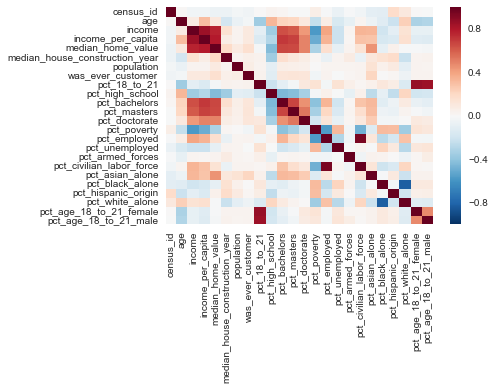

In [295]:
corr=reduced_df.corr()
sns.heatmap(corr)

From the correlation heatmap we can see that the high correlated columns are the `pct_age_18_to_21_female` and `pct_age_18_to_21_female` with the `pct_18_to_21`. So for the reason we can remove also the `pct_18_to_21` since we already have this info in the model (the sum of the other two columns)

In [296]:
reduced_df.drop(['pct_18_to_21'], axis=1, inplace=True)

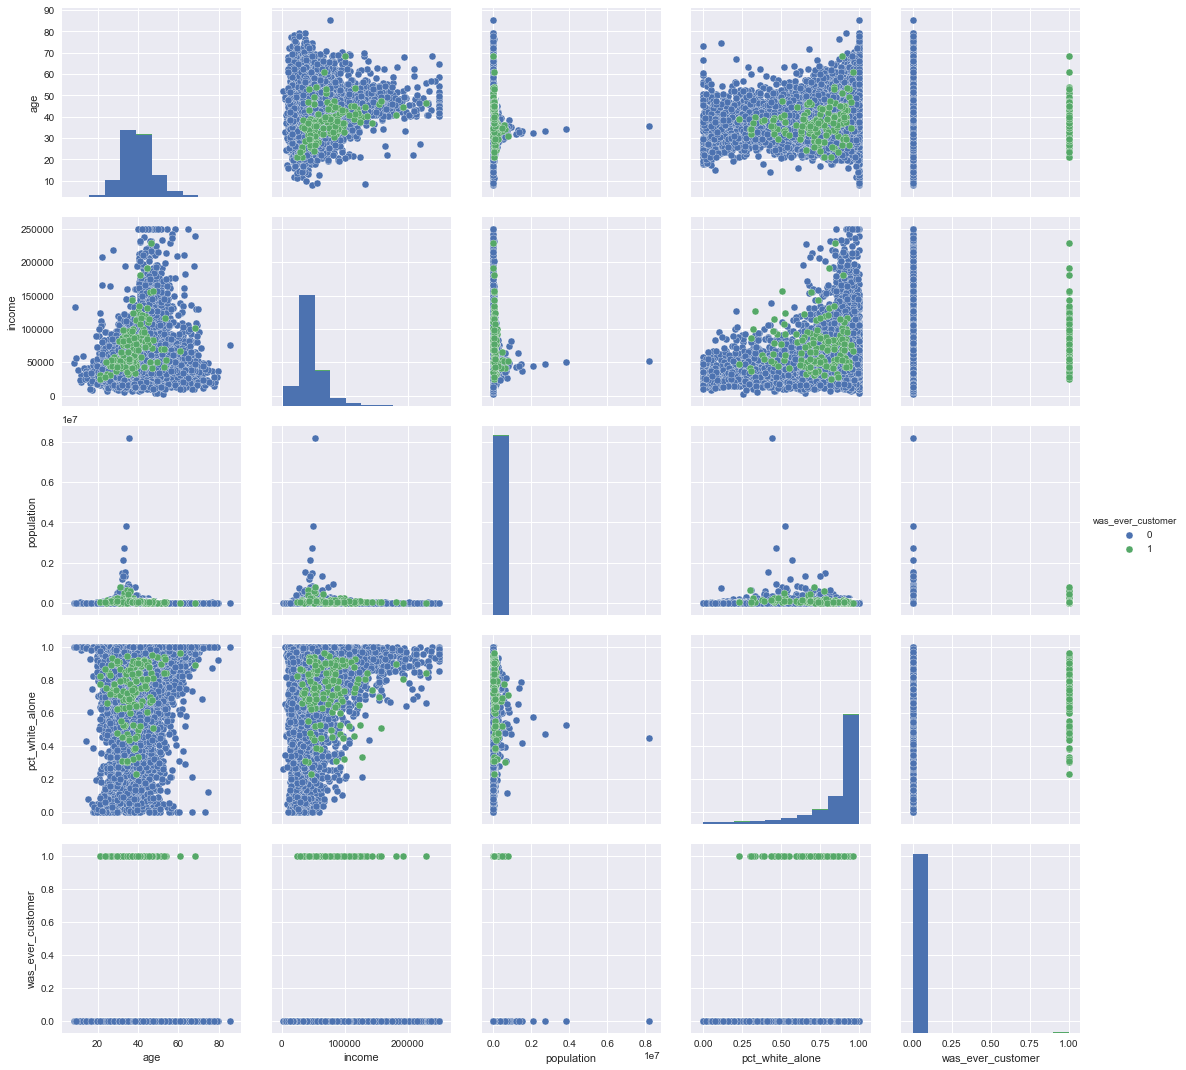

In [297]:
sns.pairplot(data=reduced_df[['age','income', 'population','pct_white_alone', 'was_ever_customer']], hue='was_ever_customer', size=3)

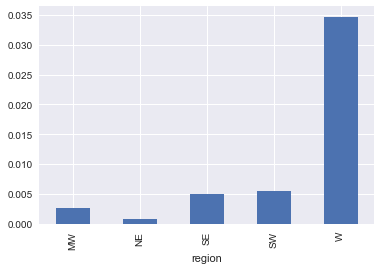

In [298]:
# As we can see in 'W' Region the chance of a census to become a client is much higher!!!

reduced_df.groupby('region').mean().was_ever_customer.plot(kind='bar')

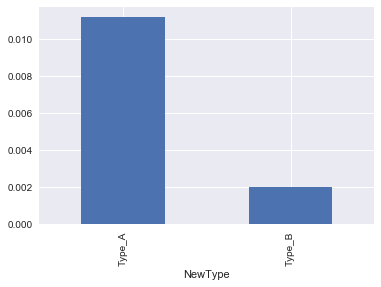

In [299]:
# Also census from bigger cities are more likely to become customers
reduced_df.groupby('NewType').mean().was_ever_customer.plot(kind='bar')

## Creating the Dummy Variables
At this point we will create the dummy variables for the column `region` and `NewType`

In [300]:
region_df=pd.get_dummies(reduced_df.region, prefix='region')
newtype_df=pd.get_dummies(reduced_df.NewType, prefix='New')

In [301]:
region_df.head()

,region_MW,region_NE,region_SE,region_SW,region_W
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [302]:
newtype_df.head()

,New_Type_A,New_Type_B
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [303]:
reduced_df=reduced_df.join([newtype_df,region_df])

In [304]:
# now we will need to drop the categorical variables since we created the dummies also we need to remove the reference levels
reduced_df.drop(['region','NewType', 'New_Type_B', 'region_NE'], axis=1, inplace=True)

## Which Machine Learning Model to Choose

Let's have a look at the Probability of a Census_ID to become a customer

In [309]:
'The Probability of a Census_ID to become a customer is {0:.2%} which is an extremely low value for data modelling'.format(reduced_df.was_ever_customer.mean())

'The Probability of a Census_ID to become a customer is 0.68% which is an extremely low value for data modelling'

For that reason we cannot treat it as **classification** problem but on contrary as a **regression** model where we will try to assign a probability of a census to become a customer. The Machine Learning Model that we will apply is the **Logistic Regression** and it will be able to assign a probability for every new Census ID provided that we know the values of the independent variables

In [260]:
reduced_df.was_ever_customer

0    0
1    0
2    0
3    0
4    0
Name: was_ever_customer, dtype: int64

In [261]:
reduced_df.head()

,census_id,age,income,income_per_capita,median_home_value,median_house_construction_year,population,was_ever_customer,pct_high_school,pct_bachelors,...,pct_black_alone,pct_hispanic_origin,pct_white_alone,pct_age_18_to_21_female,pct_age_18_to_21_male,New_Type_A,region_MW,region_SE,region_SW,region_W
0,100124,46.6,26538,17310,87800,1972,2699,0,0.144,0.082,...,0.434,0.035,0.446,0.012968,0.035939,1,0,1,0,0
1,100460,36.2,43766,21197,97300,1973,4537,0,0.235,0.056,...,0.403,0.105,0.487,0.021600,0.061274,1,0,1,0,0
2,100484,42.4,39750,17279,110600,1972,826,0,0.207,0.047,...,0.000,0.000,0.984,0.024213,0.000000,0,0,1,0,0
3,100676,50.8,24485,13843,61700,1973,369,0,0.214,0.000,...,0.791,0.000,0.209,0.027100,0.008130,0,0,1,0,0
4,100820,36.1,71250,28272,164000,1992,30372,0,0.139,0.160,...,0.150,0.101,0.759,0.017582,0.021862,1,0,1,0,0


# Build the Logistic Regression Model

In [311]:

from sklearn import linear_model

### Split the dataset into Train and Test dataset (75% vs 25%)¶

In [312]:
train_df = reduced_df.sample(frac = .75, random_state = 0)
test_df = reduced_df.drop(train_df.index)

In [316]:
train_X=train_df.drop(['census_id','was_ever_customer'], axis=1)
train_y=train_df.was_ever_customer

test_X=test_df.drop(['census_id','was_ever_customer'], axis=1)
test_y=test_df.was_ever_customer

## Print the Intercept and the Coefficients of the model

In [318]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_y)

print (model.intercept_)
print (model.coef_)

[ -2.65427355e-06]
[[ -8.30895295e-04   6.07654053e-06  -3.07754176e-05   5.70848440e-06
   -2.91317726e-03   4.75820685e-07  -1.32143581e-05   7.52607610e-06
    3.54046427e-06   1.39065403e-06  -2.96907996e-06   5.05615370e-06
    4.85416909e-07   6.00943169e-07   5.53795057e-06   1.16897250e-05
    6.98636202e-06   6.48873399e-06  -2.55815182e-05   2.07612180e-06
    1.81523082e-06   7.49559537e-05  -2.10883717e-05   6.04888231e-06
    1.31992090e-06   6.27096491e-05]]


## Get the misclassification error for the training and testing dataset

In [321]:

print ('training misclassification =', 1 - model.score(train_X, train_y))
print ('testing  misclassification =', 1 - model.score(test_X, test_y))

training misclassification = 0.00650715108791
testing  misclassification = 0.00772671817812


## Get the Odds Ratio

In [345]:

list(zip(list(train_X), np.exp(model.coef_[0]) ))

[('age', 0.99916944980272837),
 ('income', 1.0000060765589922),
 ('income_per_capita', 0.99996922505598029),
 ('median_home_value', 1.0000057085006935),
 ('median_house_construction_year', 0.99709106192628039),
 ('population', 1.0000004758207983),
 ('pct_high_school', 0.99998678572922262),
 ('pct_bachelors', 1.0000075261044241),
 ('pct_masters', 1.0000035404705354),
 ('pct_doctorate', 1.0000013906549954),
 ('pct_poverty', 0.99999703092444681),
 ('pct_employed', 1.0000050561664855),
 ('pct_unemployed', 1.0000004854170272),
 ('pct_armed_forces', 1.0000006009433493),
 ('pct_civilian_labor_force', 1.0000055379659072),
 ('pct_asian_alone', 1.0000116897932767),
 ('pct_black_alone', 1.0000069863864236),
 ('pct_hispanic_origin', 1.0000064887550422),
 ('pct_white_alone', 0.99997441880898841),
 ('pct_age_18_to_21_female', 1.0000020761239548),
 ('pct_age_18_to_21_male', 1.0000018152324643),
 ('New_Type_A', 1.0000749587629651),
 ('region_MW', 0.999978911850676),
 ('region_SE', 1.0000060489006011),


## Other Metrics for Evaluating the Model
## Confusion Matrix

In [346]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_X)
y_pred_prob=model.predict_proba(test_X)
cnf_matrix =confusion_matrix(test_y, y_pred)

In [347]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm=cm.round(2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4880    0]
 [  38    0]]


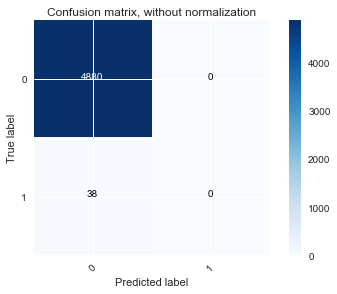

In [348]:

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

## ROC Curve and AUC

In [349]:
from sklearn import metrics

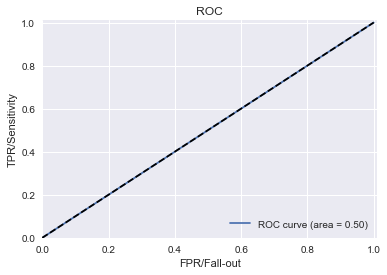

In [350]:

fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("ROC")
plt.legend(loc = 'lower right')
plt.show()

## Precision Recall and F1-Score

In [352]:

print(metrics.classification_report(test_y, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4880
          1       0.00      0.00      0.00        38

avg / total       0.98      0.99      0.99      4918



C:\Users\gpipis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Log Loss

In [353]:

metrics.log_loss(test_y, y_pred_prob[:,1])

0.037930612511325908

## Cohen Kappa

In [354]:
metrics.cohen_kappa_score(test_y, y_pred)

0.0

# Comments

Theoretically the accuracy of the model is great since it is higher than 99% but the problem is that the model predicts that all census are less likely to become customers. This is something that we expected. On contrary our scope is to define a probability of every census id in order to rank them. So the final output will be an assign probability for every census id 

In [355]:
train_df = reduced_df
train_X=train_df.drop(['census_id','was_ever_customer'], axis=1)
train_y=train_df.was_ever_customer


In [356]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_y)

In [357]:
y_pred_prob=model.predict_proba(train_X)

In [363]:
Score=pd.DataFrame(y_pred_prob[:,1])

In [367]:
Score.columns=['Score']

In [368]:
Score.head()

,Score
0,0.003545
1,0.003737
2,0.004387
3,0.003277
4,0.004885


In [380]:
output=pd.concat([reduced_df['census_id'],Score], axis=1, join='inner')

In [373]:
pd.

(19671, 28)

In [374]:
Score.shape

(19671, 1)

In [382]:
output.to_csv( 'output.csv', index=False)